In [1]:
from naive_bayes import BetaDistribution_NaiveBayes
from utility import *

from sklearn.model_selection import train_test_split
import gc

In [2]:
X=pd.read_csv('dataset/X.csv')
y=pd.read_csv('dataset/y.csv')

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=10000,random_state=43)

del X,y
gc.collect()

0

Naive Bayes Classifier

In [3]:
model=BetaDistribution_NaiveBayes()

properties={}

In [1]:
model_name='Naive_Bayes'

if 'model' in globals():
    
    best_model,result=model_selector(model,properties,train_X,train_y,n_jobs=-1,y_as_numpy=False)
    save(best_model,result,model_name)
    
else:
    from naive_bayes import BetaDistribution_NaiveBayes
    from utility import *

    from sklearn.model_selection import train_test_split
    import gc
    
    X=pd.read_csv('dataset/X.csv')
    y=pd.read_csv('dataset/y.csv')

    train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=10000,random_state=42)

    del X,y
    gc.collect()
    
    best_model,result=load(model_name)

In [2]:
result[["mean_test_score","mean_train_score"]]

,mean_test_score,mean_train_score
0,0.8412,0.844728


In [3]:
pred_y=best_model.predict(test_X)

accuracy_score(test_y,pred_y)

0.8445

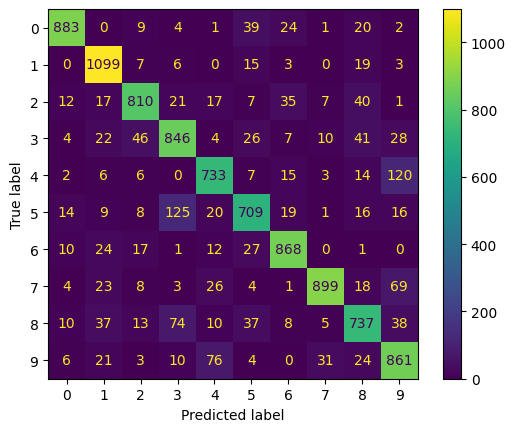

In [4]:
plot_confusion_matrix(test_y,pred_y)